In [1]:
!nvidia-smi

Thu Feb  1 21:12:50 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.23                 Driver Version: 551.23         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2060      WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   47C    P8              4W /   80W |      53MiB /   6144MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [4]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification: Violence or Non-violence
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
   r"C:\\Users\\abhay\\Downloads\\dataset\\violence_dataset",  # Replace with the path to your dataset
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'  # Binary classification
)

Found 0 images belonging to 2 classes.


Found 11063 images belonging to 2 classes.
Epoch 1/20
346/346 [==============================] - 120s 344ms/step - loss: 0.6042 - accuracy: 0.6673
Epoch 2/20
346/346 [==============================] - 120s 347ms/step - loss: 0.4655 - accuracy: 0.7740
Epoch 3/20
346/346 [==============================] - 129s 373ms/step - loss: 0.3817 - accuracy: 0.8255
Epoch 4/20
346/346 [==============================] - 136s 392ms/step - loss: 0.3443 - accuracy: 0.8479
Epoch 5/20
346/346 [==============================] - 125s 363ms/step - loss: 0.3077 - accuracy: 0.8670
Epoch 6/20
346/346 [==============================] - 130s 374ms/step - loss: 0.2803 - accuracy: 0.8791
Epoch 7/20
346/346 [==============================] - 138s 398ms/step - loss: 0.2621 - accuracy: 0.8908
Epoch 8/20
346/346 [==============================] - 121s 349ms/step - loss: 0.2369 - accuracy: 0.9023
Epoch 9/20
346/346 [==============================] - 121s 351ms/step - loss: 0.2133 - accuracy: 0.9117
Epoch 10/20
346/346 [

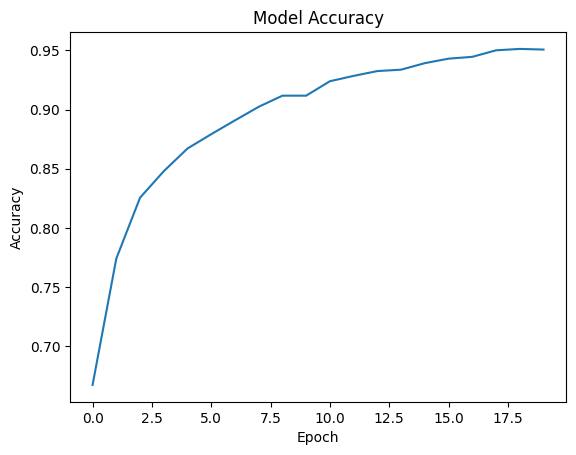

In [8]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification: Violence or Non-violence
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Create an ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Load the dataset using flow_from_directory
train_generator = train_datagen.flow_from_directory(
    r"C:\\Users\\abhay\\Downloads\\dataset\\violence_dataset",  # Path to the dataset
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'  # Binary classification
)

# Train the model
history = model.fit(train_generator, epochs=20)

# Save the model
model.save('violence_detection_model.h5')

# Plot the training history
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


In [9]:
model.save('violence_detection_model.h5')

In [24]:
import os
import random
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('violence_detection_model.h5')

# Custom video from dataset
video_dir_fight = 'C:\\Users\\abhay\\Downloads\\dataset\\test\\fight'
video_dir_non_fight = 'C:\\Users\\abhay\\Downloads\\dataset\\test\\nonFight'

video_files_fight = [file for file in os.listdir(video_dir_fight) if file.endswith('.mp4')]
video_files_non_fight = [file for file in os.listdir(video_dir_non_fight) if file.endswith('.mp4')]

# Selecting random fight video out of 1000 files
video = random.choice(video_files_fight)
video_path_fight = os.path.join(video_dir_fight, video)

# Selecting random non-fight video out of 1000 files
video = random.choice(video_files_non_fight)
video_path_non_fight = os.path.join(video_dir_non_fight, video)

# VideoCapture object
cap = cv2.VideoCapture(video_path_fight)

while True:
    ret, frame = cap.read()

    # Check if the video capture was successful
    if not ret:
        print("Failed to capture frame. Exiting...")
        break

    # Preprocess the frame
    frame = cv2.resize(frame, (224, 224))
    frame = np.expand_dims(frame, axis=0)  # Add batch dimension
    frame = frame.astype('float32') / 255.0

    # Make predictions
    prediction = model.predict(frame)

    # Display the result on the frame
    label = "Violence" if prediction[0][0] > 0.5 else "Non-Violence"
    color = (0, 0, 255) if prediction[0][0] > 0.5 else (0, 255, 0)

    cv2.putText(frame[0], label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)


    

    """
    Trying to add file name 
    on bottom of the video
    """
    # filename_text = os.path.basename(video_path_fight)
    # cv2.putText(frame[0], filename_text, (10, frame.shape[0] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)



    
    cv2.imshow('Violence Detection', frame[0])

    # Check if violence is detected and trigger an alert
    if prediction[0][0] > 0.5:
        print("Violence Detected! Triggering Alert.")

    """
    Todo. 
    
    opencv window frame ending without receiving
    any keyboard input or freezes completely
    """
    # Add a small delay and break the loop if 'q' key is pressed
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break

# Release the VideoCapture and close the OpenCV window
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 87ms/step
Violence Detected! Triggering Alert.
1/1 [==============================] - 0s 20ms/step
Violence Detected! Triggering Alert.
1/1 [==============================] - 0s 25ms/step
Violence Detected! Triggering Alert.
1/1 [==============================] - 0s 18ms/step
Violence Detected! Triggering Alert.
1/1 [==============================] - 0s 33ms/step
Violence Detected! Triggering Alert.
1/1 [==============================] - 0s 23ms/step
Violence Detected! Triggering Alert.
1/1 [==============================] - 0s 22ms/step
Violence Detected! Triggering Alert.
1/1 [==============================] - 0s 20ms/step
Violence Detected! Triggering Alert.
1/1 [==============================] - 0s 19ms/step
Violence Detected! Triggering Alert.
1/1 [==============================] - 0s 23ms/step
Violence Detected! Triggering Alert.
1/1 [==============================] - 0s 19ms/step
Violence Detected! Triggering Alert.
1/1 [================